In [91]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [ ]:
# Idade
# Parentesco
# 

In [2]:
df = pd.read_csv("data/train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [108]:
df['Sex'] = df['Sex'].apply(lambda x: 0 if x == 'male' else 1)

In [109]:
df.groupby("Survived").count()["PassengerId"]

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [110]:
df.groupby("Pclass").count()["PassengerId"]

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [111]:

for c in df.columns:
    #print(c)
    print(df.groupby(c).count().iloc[:,1].sort_values())


PassengerId
1      1
588    1
589    1
590    1
591    1
      ..
302    1
303    1
304    1
293    1
891    1
Name: Pclass, Length: 891, dtype: int64
Survived
1    342
0    549
Name: Pclass, dtype: int64
Pclass
2    184
1    216
3    491
Name: Survived, dtype: int64
Name
Abbing, Mr. Anthony                        1
Nicholson, Mr. Arthur Ernest               1
Nicola-Yarred, Master. Elias               1
Nicola-Yarred, Miss. Jamila                1
Nilsson, Miss. Helmina Josefina            1
                                          ..
Goodwin, Mr. Charles Edward                1
Goodwin, Mrs. Frederick (Augusta Tyler)    1
Graham, Miss. Margaret Edith               1
Goldschmidt, Mr. George B                  1
van Melkebeke, Mr. Philemon                1
Name: Survived, Length: 891, dtype: int64
Sex
1    314
0    577
Name: Survived, dtype: int64
Age
0.42      1
70.50     1
66.00     1
55.50     1
53.00     1
         ..
19.00    25
30.00    25
18.00    26
22.00    27
24.00    30
Nam

In [112]:

df.describe()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,flag_fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.983165
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.128725
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [113]:
df["flag_fare"] = df["Fare"].apply(lambda x: 1 if x > 0 else 0)

In [95]:
df.groupby("flag_fare").agg(['min', 'max', 'count'])[["Age", "Fare"]]

Age                Fare                
             min   max count     min       max count
flag_fare                                           
0          19.00  49.0     7  0.0000    0.0000    15
1           0.42  80.0   707  4.0125  512.3292   876

In [49]:
df[df["flag_fare"] == 'gratis'].head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,flag_fare
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,gratis
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,gratis
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,gratis
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,gratis
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,gratis
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,gratis
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,gratis
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,gratis
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,gratis
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,gratis


In [72]:
ti_val = df.groupby('Ticket').count()["PassengerId"].sort_values(ascending=False)

In [86]:
ti_val.index

Index(['CA. 2343', '1601', '347082', '347088', 'CA 2144', '3101295',
       'S.O.C. 14879', '382652', '2666', '19950'],
      dtype='object', name='Ticket')

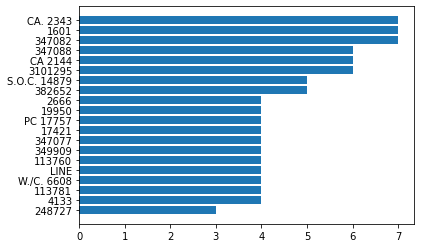

In [88]:

ti_val = df.groupby('Ticket').count()["PassengerId"].sort_values(ascending=False)

fig, ax = plt.subplots(1)

ax.barh(ti_val.index[0:20], width=ti_val.values[0:20], align='center')
ax.invert_yaxis()  # labels read top-to-bottom

plt.show()


<AxesSubplot:>

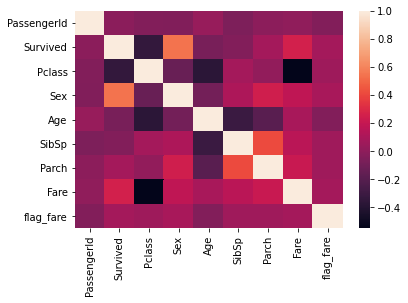

In [115]:
sns.heatmap(df.corr())

In [97]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,flag_fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.035816
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.085343
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.058774
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.037315
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.062097
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.061983
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.084850
flag_fare,-0.035816,0.085343,0.058774,-0.037315,0.062097,0.061983,0.084850,1.000000


In [119]:
df.groupby(['Survived', "Sex", "Pclass"]).agg(['mean', 'count'])

PassengerId              Age           SibSp        \
                           mean count       mean count      mean count   
Survived Sex Pclass                                                      
0        0   1       413.623377    77  44.581967    61  0.272727    77   
             2       454.010989    91  33.369048    84  0.307692    91   
             3       456.750000   300  27.255814   215  0.523333   300   
         1   1       325.000000     3  25.666667     3  0.666667     3   
             2       423.500000     6  36.000000     6  0.500000     6   
             3       440.375000    72  23.818182    55  1.291667    72   
1        0   1       527.777778    45  36.248000    40  0.377778    45   
             2       415.588235    17  16.022000    15  0.529412    17   
             3       447.638298    47  22.274211    38  0.340426    47   
         1   1       473.967033    91  34.939024    82  0.549451    91   
             2       444.785714    70  28.080882    68  0.485714    70   
             3       359.083333    72  19.329787    47  0.500000    72   

                        Parch              Fare       flag_fare        
                         mean count        mean count      mean count  
Survived Sex Pclass                                                    
0        0   1       0.259740    77   62.894910    77  0.935065    77  
             2       0.142857    91   19.488965    91  0.934066    91  
             3       0.213333   300   12.204469   300  0.990000   300  
         1   1       1.333333     3  110.604167     3  1.000000     3  
             2       0.166667     6   18.250000     6  1.000000     6  
             3       1.097222    72   19.773093    72  1.000000    72  
1        0   1       0.311111    45   74.637320    45  1.000000    45  
             2       0.647059    17   21.095100    17  1.000000    17  
             3       0.297872    47   15.579696    47  0.978723    47  
         1   1       0.428571    91  105.978159    91  1.000000    91  
             2       0.642857    70   22.288989    70  1.000000    70  
             3       0.500000    72   12.464526    72  1.000000    72

In [105]:
df.groupby("Pclass").agg(['min','median','max','mean'])["Age"]

,min,median,max,mean
Pclass,,,,
1,0.92,37.0,80.0,38.233441
2,0.67,29.0,70.0,29.877630
3,0.42,24.0,74.0,25.140620


In [120]:
df.groupby(['Survived', "Sex"]).agg(['mean', 'count'])

PassengerId          Pclass              Age           SibSp  \
                    mean count      mean count       mean count      mean   
Survived Sex                                                                
0        0    449.121795   468  2.476496   468  31.618056   360  0.440171   
         1    434.851852    81  2.851852    81  25.046875    64  1.209877   
1        0    475.724771   109  2.018349   109  27.276022    93  0.385321   
         1    429.699571   233  1.918455   233  28.847716   197  0.515021   

                       Parch             Fare       flag_fare        
             count      mean count       mean count      mean count  
Survived Sex                                                         
0        0     468  0.207265   468  21.960993   468  0.970085   468  
         1      81  1.037037    81  23.024385    81  1.000000    81  
1        0     109  0.357798   109  40.821484   109  0.990826   109  
         1     233  0.515021   233  51.938573   233  1.000000   233

In [ ]:
df.groupby(['survived', "sex"]).count()

In [ ]:
df.groupby(['survived', "sex"]).agg(
    pclass_count=("pclass", "count"),
    age_min=("age", "min"),
    age_max=("age", "max"),
)